# Epistemic uncertainty

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import numpy as np

from models import *
from utils import *

## Data

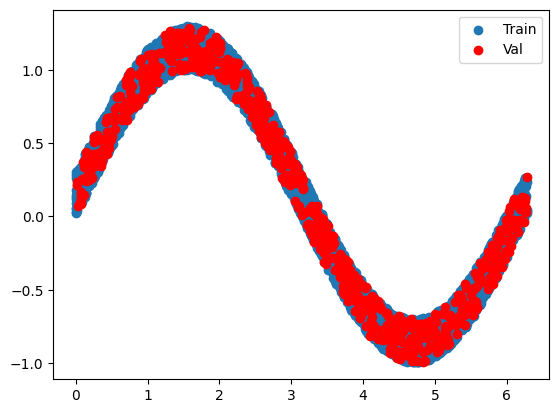

In [2]:
X = torch.rand(5000)*2*torch.pi
Y = torch.sin(X) + torch.rand(5000)*0.3

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Val', c='red')
plt.legend()

In [3]:
X_train, X_test, y_train, y_test = X_train.view(-1, 1), X_test.view(-1, 1), y_train.view(-1, 1), y_test.view(-1, 1)

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True, drop_last=True)

## Deep ensemble

In [4]:
base_model_1 = MLP() 
optimizer = torch.optim.Adam(base_model_1.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(base_model_1, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=50)

base_model_2 = MLP() 
optimizer = torch.optim.Adam(base_model_2.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(base_model_2, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=50)

base_model_3 = MLP() 
optimizer = torch.optim.Adam(base_model_3.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(base_model_3, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=50)

base_model_4 = MLP() 
optimizer = torch.optim.Adam(base_model_4.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(base_model_4, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=50)

Epoch: 50 :::: Train loss 0.010174852795898914 :::: Val loss 0.009459279477596283

Epoch: 100 :::: Train loss 0.00822456181049347 :::: Val loss 0.008073577657341957

Epoch: 50 :::: Train loss 0.01125671062618494 :::: Val loss 0.010433794930577278

Epoch: 100 :::: Train loss 0.010569381527602673 :::: Val loss 0.010858624242246151

Epoch: 50 :::: Train loss 0.008944470435380936 :::: Val loss 0.008700688369572163

Epoch: 100 :::: Train loss 0.008489166386425495 :::: Val loss 0.00849640928208828

Epoch: 50 :::: Train loss 0.009106088429689407 :::: Val loss 0.008307947777211666

Epoch: 100 :::: Train loss 0.008750027976930141 :::: Val loss 0.008797908201813698



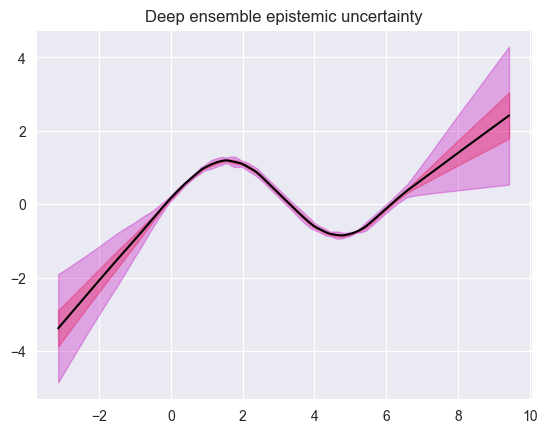

In [5]:
x_plot = torch.linspace(-1*np.pi,3*np.pi,200).view(-1, 1)

y_model = base_model_1(x_plot.to('cuda'))
y_model = torch.cat((y_model,base_model_2(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_3(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_4(x_plot.to('cuda'))),dim=1)
y_model = y_model.cpu().detach()

y_mean = torch.mean(y_model,dim=1)
y_std = torch.std(y_model,dim=1)

plot_uncertanity(x_plot, y_mean, y_std, 'Deep ensemble epistemic uncertainty')

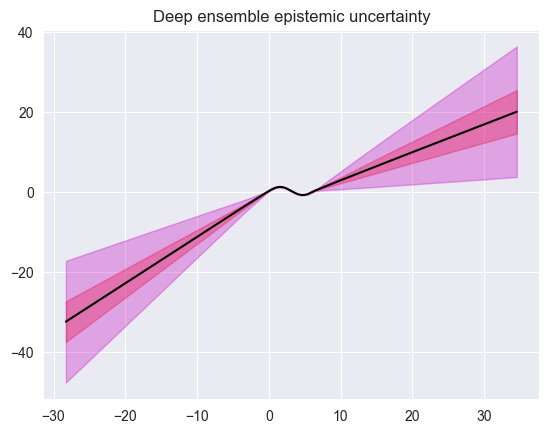

In [6]:
x_plot = torch.linspace(-9*np.pi,11*np.pi,200).view(-1, 1)

y_model = base_model_1(x_plot.to('cuda'))
y_model = torch.cat((y_model,base_model_2(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_3(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_4(x_plot.to('cuda'))),dim=1)
y_model = y_model.cpu().detach()

y_mean = torch.mean(y_model,dim=1)
y_std = torch.std(y_model,dim=1)

plot_uncertanity(x_plot, y_mean, y_std, 'Deep ensemble epistemic uncertainty')

## Masksemble

In [7]:
mask_model = MLP_Maksembles(4,2.0) 
optimizer = torch.optim.Adam(mask_model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(mask_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=10)

Epoch: 10 :::: Train loss 0.018923800438642502 :::: Val loss 0.016476817429065704

Epoch: 20 :::: Train loss 0.011987264268100262 :::: Val loss 0.010690168477594852

Epoch: 30 :::: Train loss 0.011417601257562637 :::: Val loss 0.010035010986030102

Epoch: 40 :::: Train loss 0.011658189818263054 :::: Val loss 0.010709683410823345

Epoch: 50 :::: Train loss 0.009834528900682926 :::: Val loss 0.009400405921041965

Epoch: 60 :::: Train loss 0.010202884674072266 :::: Val loss 0.009532272815704346

Epoch: 70 :::: Train loss 0.010021593421697617 :::: Val loss 0.00933994259685278

Epoch: 80 :::: Train loss 0.009110898710787296 :::: Val loss 0.010143287479877472

Epoch: 90 :::: Train loss 0.009359844960272312 :::: Val loss 0.009416055865585804

Epoch: 100 :::: Train loss 0.009746312163770199 :::: Val loss 0.011832447722554207



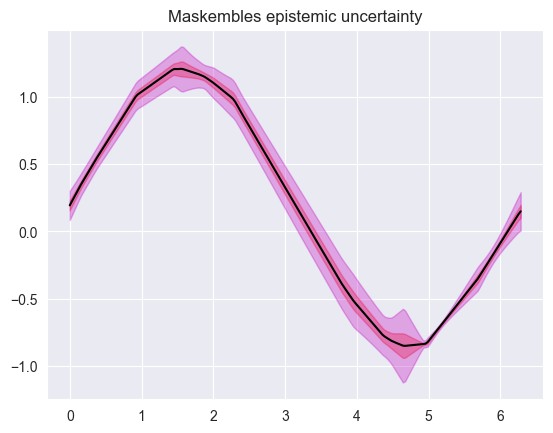

In [8]:
x_plot = torch.linspace(0,2*np.pi,200).view(-1, 1)

y_model = mask_model(torch.tile(x_plot,(4,1)).to('cuda'))
y_model = torch.cat((y_model[:200], y_model[200:400], y_model[400:600], y_model[600:]),dim=1)
y_model = y_model.cpu().detach()

y_mean = torch.mean(y_model,dim=1)
y_std = torch.std(y_model,dim=1)

plot_uncertanity(x_plot, y_mean, y_std, 'Maskembles epistemic uncertainty')

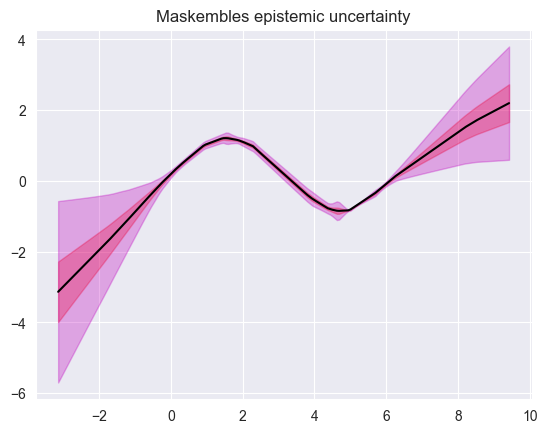

In [9]:
x_plot = torch.linspace(-1*np.pi,3*np.pi,200).view(-1, 1)

y_model = mask_model(torch.tile(x_plot,(4,1)).to('cuda'))
y_model = torch.cat((y_model[:200], y_model[200:400], y_model[400:600], y_model[600:]),dim=1)
y_model = y_model.cpu().detach()

y_mean = torch.mean(y_model,dim=1)
y_std = torch.std(y_model,dim=1)

plot_uncertanity(x_plot, y_mean, y_std, 'Maskembles epistemic uncertainty')


## Dropout

In [10]:
drop_model = MLP_Dropout() 
optimizer = torch.optim.Adam(drop_model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(drop_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=10)

Epoch: 10 :::: Train loss 0.08830281347036362 :::: Val loss 0.05307198315858841

Epoch: 20 :::: Train loss 0.039794787764549255 :::: Val loss 0.01854763738811016

Epoch: 30 :::: Train loss 0.0416596494615078 :::: Val loss 0.013377826660871506

Epoch: 40 :::: Train loss 0.036896783858537674 :::: Val loss 0.012200276367366314

Epoch: 50 :::: Train loss 0.037019722163677216 :::: Val loss 0.014489702880382538

Epoch: 60 :::: Train loss 0.03361264988780022 :::: Val loss 0.01635192148387432

Epoch: 70 :::: Train loss 0.03258441761136055 :::: Val loss 0.012915926054120064

Epoch: 80 :::: Train loss 0.03790390118956566 :::: Val loss 0.014020994305610657

Epoch: 90 :::: Train loss 0.03624962642788887 :::: Val loss 0.012455298565328121

Epoch: 100 :::: Train loss 0.03512512519955635 :::: Val loss 0.018254635855555534



In [11]:
#Activando dropout en inferencia
drop_model.eval()
for m in drop_model.modules():
  if m.__class__.__name__.startswith('Dropout'):
    m.train()

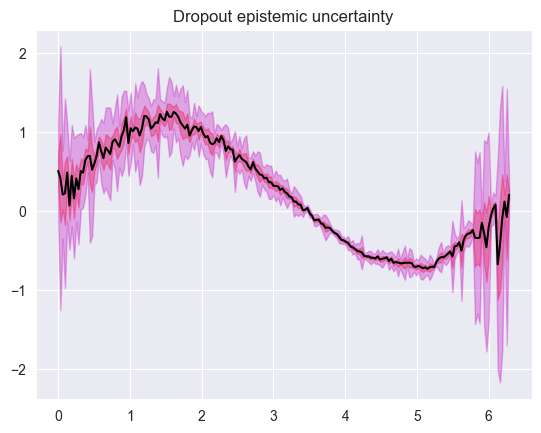

In [12]:
x_plot = torch.linspace(0,2*np.pi,200).view(-1, 1)
N_model = 4

y_model = drop_model(x_plot.to('cuda'))
for i in range(N_model-1):
    y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)
y_model = y_model.cpu().detach()

y_mean = torch.mean(y_model,dim=1)
y_std = torch.std(y_model,dim=1)

plot_uncertanity(x_plot, y_mean, y_std, 'Dropout epistemic uncertainty')

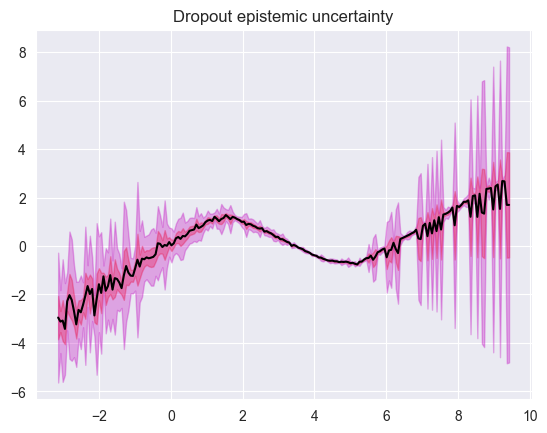

In [13]:
x_plot = torch.linspace(-1*np.pi,3*np.pi,200).view(-1, 1)

y_model = drop_model(x_plot.to('cuda'))
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)
y_model = y_model.cpu().detach()

y_mean = torch.mean(y_model,dim=1)
y_std = torch.std(y_model,dim=1)

plot_uncertanity(x_plot, y_mean, y_std, 'Dropout epistemic uncertainty')